Have used 3 types of integrators in this notebook - Monte-Carlo, Trapezoid and Riemann (i.e. rectangular)

The goal is to attempt to integrate a function (called fn) that does not seem to have an analytic solution at the moment (maybe will find one soon)

Also - making observations about the behaviour of the graph of fn and its integral

Note - found trapezoid integrator to be most precise and efficient - possibly most accurate.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def fn(u, y):
    return (np.e**(u))*np.sqrt(u**2 + y**2)

Now trying Monte-Carlo Method:

In [3]:
import random as rand

In [4]:
def monte_carlo_integrator(a, b, n, c=0):
    n = int(n)
    dx = (b - a)/n
    area = 0
    for i in range(n+1):
        area += dx*fn(rand.uniform(a, b), c)
    return area

In [5]:
print(monte_carlo_integrator(-10, 10, int(1e1), 8))

29112.0695804


In [6]:
print(monte_carlo_integrator(-10, 10, int(1e2), 8))

270182.062239


In [7]:
print(monte_carlo_integrator(-10, 10, int(1e3), 8))

281864.191475


In [8]:
print(monte_carlo_integrator(-10, 10, int(1e4), 8))

268466.294549


In [9]:
print(monte_carlo_integrator(-10, 10, int(1e5), 8))

262532.500293


In [10]:
print(monte_carlo_integrator(-10, 10, int(1e6), 8))

266184.351943


In [11]:
print(monte_carlo_integrator(-10, 10, int(1e6), 8))

264578.062639


In [12]:
print(monte_carlo_integrator(-10, 10, int(1e7), 8))

265934.410558


Now trying Trapezoid rule:

In [13]:
def trapezoid_integrator(a, b, n, c=0):
    n = int(n)
    dx = (b - a)/n
    area = dx*((fn(a, c) + fn(b, c))/2)
    for i in range(2, n):
        area += dx*(fn(a + i*dx, c))
    return area

In [14]:
print(trapezoid_integrator(-10, 10, 1e1, 8))

358713.503925


In [15]:
print(trapezoid_integrator(-10, 10, 1e2, 8))

266696.497898


In [16]:
print(trapezoid_integrator(-10, 10, 1e3, 8))

265709.631492


In [17]:
print(trapezoid_integrator(-10, 10, 1e4, 8))

265699.755464


In [18]:
print(trapezoid_integrator(-10, 10, 1e5, 8))

265699.656704


In [19]:
print(trapezoid_integrator(-10, 10, 1e6, 8))

265699.655716


In [20]:
print(trapezoid_integrator(-10, 10, 1e6, 8))

265699.655716


In [21]:
#print(trapezoid_integrator(-10, 10, 1e7, 8)) - took too long

Now trying Riemann sum - i.e. Rectangular integration:

In [22]:
def riemann_integrator(a, b, n, c=0):
    n = int(n)
    dx = (b - a)/n
    area = 0
    for i in range(n):
        area += dx*(fn(a + i*dx, c))
    return area

In [23]:
print(riemann_integrator(-10, 10, 1e1, 8))

76637.1181058


In [24]:
print(riemann_integrator(-10, 10, 1e2, 8))

238488.858697


In [25]:
print(riemann_integrator(-10, 10, 1e3, 8))

262888.86757


In [26]:
print(riemann_integrator(-10, 10, 1e4, 8))

265417.679072


In [27]:
print(riemann_integrator(-10, 10, 1e5, 8))

265671.449065


In [28]:
print(riemann_integrator(-10, 10, 1e6, 8))

265696.834952


In [29]:
print(riemann_integrator(-10, 10, 1e6, 8))

265696.834952


In [34]:
#print(riemann_integrator(-10, 10, 1e7, 8)) - took too long

Analyzing behaviour of fn and its integral. Have used trapezoid integrator as was more precise.

In [35]:
fn(10, 6) - trapezoid_integrator(-10, 10, 1e6, 6)

18237.133079149586

In [37]:
fn(10, 8) - trapezoid_integrator(-10, 10, 1e6, 8)

16376.738275052165

In [38]:
fn(10, 6) - trapezoid_integrator(-10, 10, 1e6, 6) - abs(f(-10, 6))

ValueError: dfnum <= 0

In [41]:
fn(10, 14) - trapezoid_integrator(-10, 10, 1e6, 14)

11864.642070689879

In [42]:
fn(10, 10000) - trapezoid_integrator(-10, 10, 1e6, 10000)

20.270475655794144

In [45]:
fn(10, 200000) - trapezoid_integrator(-10, 10, 1e6, 200000)

9.9245061874389648

From above, we find that the difference between fn(10, y) and its integral (from -10 to 10, for given y), decreases as y increases

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


<IPython.core.display.Javascript object>


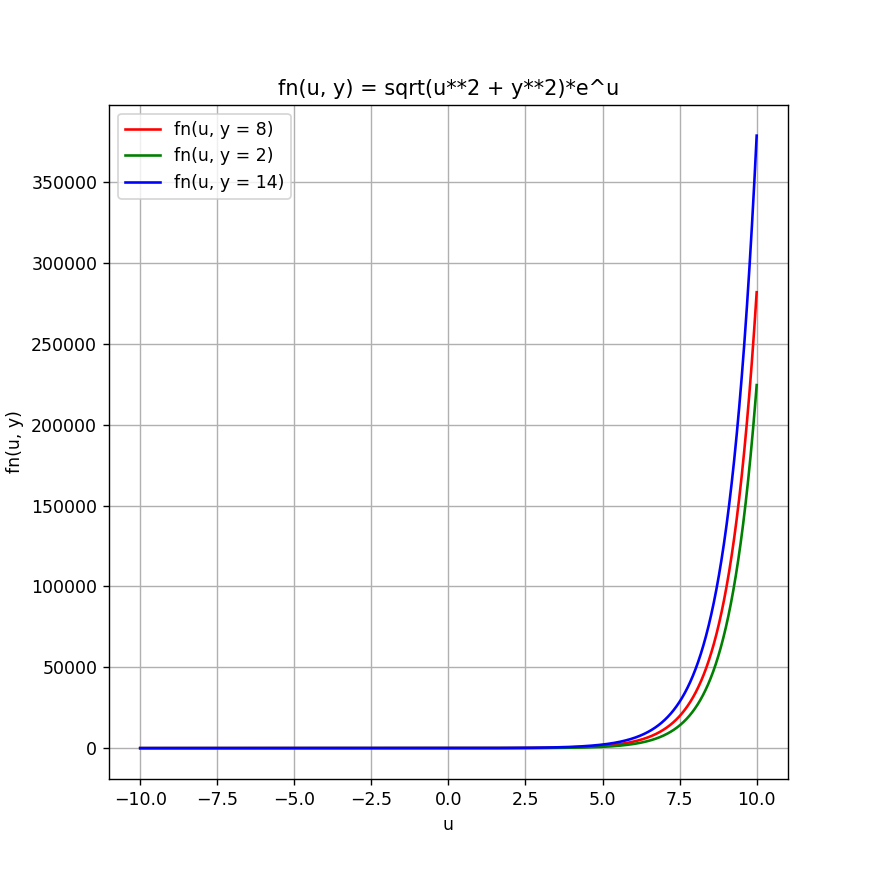

In [40]:
plt.close()
x_array = np.linspace(-10, 10, 1e5)
fig1 = figure(figsize=(7,7))
plt.plot(x_array, fn(x_array, 8), 'r-', label="fn(u, y = 8)")
plt.plot(x_array, fn(x_array, 2), 'g-', label="fn(u, y = 2)")
plt.plot(x_array, fn(x_array, 14), 'b-', label="fn(u, y = 14)")
plt.grid(True)
plt.title("fn(u, y) = sqrt(u**2 + y**2)*e^u")
plt.xlabel("u")
plt.ylabel("fn(u, y)")
plt.legend()